# Capstone Project - Battle of the Neighborhoods
___
This file contributes to the final Coursera Capstone Project as part of the IBM Data Science Proffesional Certificate program

I will review each section of the assignment as reference.

#### Week 1 – Part 1
Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.
This submission will eventually become your Introduction/Business Problem section in your final report. 

#### Week 1 – Part 2
Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.
This submission will eventually become your Data section in your final report.

#### Week 2 – Part 3
In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following: 
- A full report consisting of all of the following components: 
- Introduction where you discuss the business problem and who would be interested in this project.
- Data where you describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
- Results section where you discuss the results.
- Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.
- A link to your Notebook on your Github repository pushed showing your code. 
- Your choice of a presentation or blogpost.



## Introduction
___
#### Background
Relocating for work can be intimidating – even more so when you have to relocate to another country which you have never been to before and now you have to take your partner or family into account as well. It’s an overwhelming life event that makes you start thinking - **what should I do, where do I begin and how do I approach this?** The idea for this Capstone Project is to show how leveraging location data from FourSquare and other data sources can assist you with  making decisions based on your individual needs when having to relocate. 


The approach will be to follow and apply the systematic data science methodology to our scenario where I will:

1. Understand the problem and identify our approach 
2. Identify the required data
3. Collect and understand the data 
4. Prepare the data
5. Analyze the data
6. Model the data 
7. Evaluate the model

#### Problem
In this scenario the individual needs to relocate to Boston, Massachusetts, United States where he will be working. He needs to take his partner (who is a chef) into consideration as she will be relocating with him and will also have to look for a new job. He also need to take his child into consideration for a school.  

He starts off by listing his and his family's basic wants and needs to identify how to approach the problem and to identify what data is required. 

|Basic Needs| Family Wants|
|-----------|-------------|
|Security|To live in a safe environment|
|Close to working locations| Must have loads of restaurants in the area, Close to Museum|
|Public Elementary school|Neighborhood close to school|


The individual, who works at The Museum of Science, will have to identify a neighborhood to live in taking into consideration the follwing key elements. It should be in a **safe environment, reasonably located from his work**, but also be in a **area where there are many restaurants** to provide a wide opportunity range for his partner to look for a job and have a **public Elementary school in the vicinity** for his kid. Our approach will be to predict the best neighborhood to live in based on the data gathered.

#### Interest
This solution is targeted to assist any individual who must relocate to another country, to identify ideal locations of which neighborhood to live in whilst taking more than one person i.e. the family's or partner needs into account.



## Data
___ 
#### Data acquisition and cleaning
From the basic wants and needs list in the scenario description, I can see that I require the following data:
1. Crime data
2. School data
3. FourSquare data on restaurants and work location 

I will thus make use of open source data from Analyze Boston which is the City of Boston's open data hub. From here I can obtain the crime data as well as school data. This will assist me in identifying safer neighborhoods to live in and where the options are for Elementary schools.

I'll also make use of the FourSquare API to query for geographical data on restaurants. It will be ideal to stay in the neighborhood or close to the neighborhood where there are many restaurants as a potential work option for the wife. I'll also make use of FourSquare to identify the location of the museum so that it can be taken into consideration when identifying possible neigborhoods to minimize extensive travel where possible.

For each dataset used in this study I'll follow a similar approach to first explain where the data comes from, what is contained in the data and how I prepared the data in order to start working with a clean dataset. 

### Boston Crime Data
___

The dataset can be downloaded from the [Boston data portal]( https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system). This is a dataset containing records for crime incident reports as provided by the Boston Police Department and includes types of incidents as well as when and where it occurred.

This data, when analysed, will allow me to identify lower crime neighborhoods and to consider these as possible options for neighborhood selections

I first install all libraries that will be required to read the data.
The data is then extracted and read into a pandas dataframe.

In [1]:
#Libraries to import

!pip install beautifulsoup4
!pip install xlrd

import pandas as pd
import numpy as np
import requests
import random # library for random number generation

import matplotlib as plt
import seaborn as sns
%matplotlib inline 

from bs4 import BeautifulSoup

In [2]:
##Foursquare libraries
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
    
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.0.1         | 575 KB    | ##################################### | 1

My dataset source is identified and read into a dataframe

In [4]:
#Dataset
CD='https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmp9z6400g0.csv'
#Read data in pandas dataframe
dfCD = pd.read_csv(CD)
dfCD.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


From the dataframe you can see there is information such as incident number, type of offense,district, date and location. Not all of these attributes are required. The following data was imported to create a new dataframe as we only need to know the type of offense and where and when it occured so that we can monitor the trend with regards to the crime in the neighborhoods.
- Offense Code Group
- Offense Description
- Year
- Month
- Street
- Occurred on date
- Lat
- Long

An example of the Crime datatframe with only the required data can be seen below. The columns that we won't be using was removed.

In [5]:
#Only capture data columns required
dfCD=dfCD[[ 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','YEAR', 'MONTH', 'STREET','OCCURRED_ON_DATE', 'Lat', 'Long', 'Location']]
dfCD

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location
0,NaN,ASSAULT - AGGRAVATED,2019,10,RIVERVIEW DR,2019-10-16 00:00:00,NaN,NaN,"(0.00000000, 0.00000000)"
1,NaN,VERBAL DISPUTE,2019,12,DAY ST,2019-12-20 03:08:00,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,NaN,INVESTIGATE PERSON,2019,10,GIBSON ST,2019-10-23 00:00:00,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,2019,11,BROOKS ST,2019-11-22 07:50:00,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,NaN,SICK ASSIST,2019,11,WASHINGTON ST,2019-11-05 18:00:00,42.309718,-71.104294,"(42.30971800, -71.10429400)"
5,NaN,VANDALISM,2019,11,BRADLEE ST,2019-11-02 05:09:00,42.271616,-71.118074,"(42.27161600, -71.11807400)"
6,NaN,PROPERTY - LOST/ MISSING,2020,2,SEAPORT BLVD,2020-02-09 00:30:00,42.352756,-71.047481,"(42.35275600, -71.04748100)"
7,NaN,VANDALISM,2020,1,SOUTH ST,2020-01-16 16:30:00,42.309764,-71.115412,"(42.30976400, -71.11541200)"
8,NaN,PROPERTY - LOST/ MISSING,2020,1,WASHINGTON ST,2020-01-25 12:00:00,42.309718,-71.104294,"(42.30971800, -71.10429400)"
9,NaN,M/V ACCIDENT - PERSONAL INJURY,2020,1,NaN,2020-01-02 07:00:00,42.350341,-71.147864,"(42.35034100, -71.14786400)"


The data is then processed and all rows containing entries with no data is removed

In [6]:
#Drop empty rows
dfCD2 = dfCD.dropna()
dfCD2 = dfCD2[dfCD2.Lat != -1]
dfCD2

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location
15,Auto Theft,AUTO THEFT,2019,10,LINCOLN ST,2019-10-13 09:28:24,42.259518,-71.121563,"(42.25951765, -71.12156299)"
16,Auto Theft,AUTO THEFT,2019,10,METROPOLITAN AVE,2019-10-12 20:11:26,42.262092,-71.116710,"(42.26209214, -71.11670964)"
17,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,2019,10,ALLSTON ST,2019-10-12 15:12:43,42.352375,-71.135096,"(42.35237455, -71.13509584)"
18,Auto Theft,AUTO THEFT,2019,10,SAINT JAMES AVE,2019-10-12 04:41:52,42.349476,-71.076402,"(42.34947586, -71.07640150)"
19,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,2019,10,N MEAD ST,2019-10-02 08:08:49,42.381846,-71.066551,"(42.38184582, -71.06655134)"
20,Investigate Property,INVESTIGATE PROPERTY,2019,9,WILMORE ST,2019-09-29 06:39:00,42.277964,-71.092463,"(42.27796370, -71.09246318)"
21,Investigate Person,INVESTIGATE PERSON,2019,9,NASHUA ST,2019-09-29 03:45:00,42.367690,-71.065863,"(42.36769032, -71.06586347)"
22,Vandalism,VANDALISM,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)"
23,Verbal Disputes,VERBAL DISPUTE,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)"
24,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,2019,9,ALBANY ST,2019-09-29 05:50:00,42.332419,-71.075013,"(42.33241896, -71.07501315)"


I then obtain a list of all the crime groups so that I can change my dataframe to only contain crimes considered serious. This is really up to each individual to decide on what is considered serious or not.

In [7]:
#List of crimes
CrimeGroupIndex = dfCD2.OFFENSE_CODE_GROUP.unique()
CrimeGroupIndex

array(['Auto Theft', 'Investigate Property', 'Investigate Person',
       'Vandalism', 'Verbal Disputes', 'Motor Vehicle Accident Response',
       'Aggravated Assault', 'Residential Burglary', 'Larceny',
       'Firearm Violations', 'Medical Assistance', 'Simple Assault',
       'Missing Person Reported', 'Robbery', 'Property Lost',
       'Violations', 'Firearm Discovery', 'Warrant Arrests', 'Other',
       'Ballistics', 'Towed', 'Drug Violation', 'Fire Related Reports',
       'Fraud', 'Disorderly Conduct', 'Larceny From Motor Vehicle',
       'Police Service Incidents', 'Missing Person Located', 'Harassment',
       'Property Found', 'Liquor Violation', 'Property Related Damage',
       'Confidence Games', 'Commercial Burglary',
       'Recovered Stolen Property', 'Homicide', 'Other Burglary',
       'Assembly or Gathering Violations', 'Counterfeiting',
       'Prisoner Related Incidents', 'License Plate Related Incidents',
       'Restraining Order Violations', 'Search Warrants',


Offenses not considered as serious crimes were removed from the dataset i.e. Investigate Person, Medical Assistance, Investigate Property, Warrant for arrest, Animal Incidents, Violations etc. 

In [8]:
#Create serious crimes dictionary
CrimeGroups=['Auto Theft', 'Vandalism', 'Aggravated Assault', 'Residential Burglary', 'Larceny','Simple Assault',
             'Robbery', 'Fraud', 'Larceny From Motor Vehicle','Commercial Burglary','Homicide', 
              'Other Burglary','Prostitution','Explosives', 'Arson','Manslaughter',
             'HUMAN TRAFFICKING','HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE','Burglary - No Property Taken']

#Only include serious crimes in the dictionary
dfCDgroup=dfCD2[dfCD2.OFFENSE_CODE_GROUP.isin(CrimeGroups)]
dfCDgroup

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location
15,Auto Theft,AUTO THEFT,2019,10,LINCOLN ST,2019-10-13 09:28:24,42.259518,-71.121563,"(42.25951765, -71.12156299)"
16,Auto Theft,AUTO THEFT,2019,10,METROPOLITAN AVE,2019-10-12 20:11:26,42.262092,-71.116710,"(42.26209214, -71.11670964)"
17,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,2019,10,ALLSTON ST,2019-10-12 15:12:43,42.352375,-71.135096,"(42.35237455, -71.13509584)"
18,Auto Theft,AUTO THEFT,2019,10,SAINT JAMES AVE,2019-10-12 04:41:52,42.349476,-71.076402,"(42.34947586, -71.07640150)"
19,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,2019,10,N MEAD ST,2019-10-02 08:08:49,42.381846,-71.066551,"(42.38184582, -71.06655134)"
22,Vandalism,VANDALISM,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)"
26,Vandalism,VANDALISM,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
27,Aggravated Assault,ASSAULT - AGGRAVATED,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
29,Residential Burglary,BURGLARY - RESIDENTIAL - ATTEMPT,2019,9,ABBOTSFORD ST,2019-09-29 04:40:00,42.314630,-71.092615,"(42.31462973, -71.09261520)"
36,Larceny,LARCENY ALL OTHERS,2019,9,W BROADWAY,2019-09-29 03:04:00,42.340070,-71.052794,"(42.34006986, -71.05279420)"


I also renamed all related incidents to a single category i.e. Other Burglary and Residential Burglary will become just Burglary and Simple Assault will become Assault etc.

I then lastly removed any other columns I realise I wont be needing any further such as the Offense Description.

In [9]:
#Rename crimes to related groups
replace={'Residential Burglary':'Burglary','Commercial Burglary':'Burglary','Other Burglary':'Burglary','Burglary - No Property Taken':'Burglary',
         'Aggravated Assault':'Assault','Simple Assault':'Assault','Larceny From Motor Vehicle':'Larceny','HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'HUMAN TRAFFICKING'}

dfCDgroup=dfCDgroup.replace({"OFFENSE_CODE_GROUP":replace})
dfCDgroup=dfCDgroup.drop(['OFFENSE_DESCRIPTION'],axis=1)
dfCD=dfCDgroup
dfCD

,OFFENSE_CODE_GROUP,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location
15,Auto Theft,2019,10,LINCOLN ST,2019-10-13 09:28:24,42.259518,-71.121563,"(42.25951765, -71.12156299)"
16,Auto Theft,2019,10,METROPOLITAN AVE,2019-10-12 20:11:26,42.262092,-71.116710,"(42.26209214, -71.11670964)"
17,Auto Theft,2019,10,ALLSTON ST,2019-10-12 15:12:43,42.352375,-71.135096,"(42.35237455, -71.13509584)"
18,Auto Theft,2019,10,SAINT JAMES AVE,2019-10-12 04:41:52,42.349476,-71.076402,"(42.34947586, -71.07640150)"
19,Auto Theft,2019,10,N MEAD ST,2019-10-02 08:08:49,42.381846,-71.066551,"(42.38184582, -71.06655134)"
22,Vandalism,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)"
26,Vandalism,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
27,Assault,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
29,Burglary,2019,9,ABBOTSFORD ST,2019-09-29 04:40:00,42.314630,-71.092615,"(42.31462973, -71.09261520)"
36,Larceny,2019,9,W BROADWAY,2019-09-29 03:04:00,42.340070,-71.052794,"(42.34006986, -71.05279420)"


My crime data is now cleaned up and ready to be analyzed

### Boston School Data
___

The dataset can be downloaded from the [Boston data portal](https://data.boston.gov/dataset/buildbps-facilities-and-educational-data-for-boston-public-schools). This dataset gives general information about each school building, the type of schools as well as location data. This dataset contains information relating to school building investments, but contains much more information than the standard public school dataset and thus is the dataset of choice. Knowing the type of school as well as the location will assist in deciding the neigborhood to live in.

The data is first extracted and read into a pandas dataframe.

In [10]:
#Extract school data to pandas dataframe
SD='https://data.boston.gov/dataset/b2c5a9d3-609d-49ec-906c-b0e850a8d62a/resource/dd3e5406-0f4c-47ad-9c3d-da1213ccb868/download/buildbps.xlsx'
dfSD = pd.read_excel(SD)
dfSD.head()

,SMMA_Identifier,SMMA_Only_For_Map,BPS_School_Name,BPS_Historical_Name,SMMA_Abbreviated_Name,BPS_Address,BRA_Neighborhood,SMMA_latitude,SMMA_longitude,SMMA_Typology,...,SMMA_EA_K8_Adequacy_Cafeteria,SMMA_EA_K8_Adequacy_Stage,SMMA_EA_K8_Adequacy_Medical,SMMA_EA_K8_Adequacy_Administration,SMMA_EA_K8_Adequacy_Custodial,SMMA_EA_K8_Adequacy_Network,SMMA_EA_K8_Adequacy_Other_1,SMMA_EA_K8_Adequacy_Other_2,SMMA_EA_K8_Adequacy_Other_3,SMMA_EA_K8_Overall_EFE_spaces
0,031,NaN,"Adams, Samuel Elementary",Adams,Adams,"165 Webster St East Boston, MA 02128",East Boston,42.365553,-71.034917,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,078,NaN,"Alighieri, Dante Montessori School",Alighieri,Alighieri,"37 Gove Street East Boston, MA 02128",East Boston,42.371565,-71.037608,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,045A,NaN,Another Course to College*,Taft,ACC*,"20 Warren Street Brighton, MA 02135",Allston,42.350354,-71.145582,High School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,012,NaN,Baldwin Early Learning Pilot Academy,Baldwin ELC,Baldwin,"121 Corey Rd Brighton, MA 02135",Brighton,42.342037,-71.140529,Early Learning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,087,NaN,"Bates, Phineas Elementary",Bates,Bates,"426 Beech St Roslindale, MA 02131",Roslindale,42.277663,-71.135353,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the dataset, the information seems quite cryptic. But there are pdf documents on the website that describes the data keys and I'll make use of those file to extract and rename the columns that I need. 
I first extract the information with regards to the dataset.

In [11]:
#Understand the range index, columns and data types that you'll be working with - could also use shape for dataset size
print (dfSD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 251 entries, SMMA_Identifier to SMMA_EA_K8_Overall_EFE_spaces
dtypes: datetime64[ns](1), float64(35), int64(4), object(211)
memory usage: 276.6+ KB
None


From the information I can see that there are 141 data entries and 251 columns


The following describes the data keys and associated information we require:
- **BPS_School_Name:** School Name
- **BPS_Address:** School Address
- **BRA_Neighborhood  :** School Neighborhood    
- **SMMA_latitude:** Latitude
- **SMMA_longitude:** Longitude
- **SMMA_Typology:** Type of School


Next I'll create a new dataframe that contains only the above mentioned data columns. Column prefixes specify the source and category of information for each field but I'll remove that information when cleaning up the dataset and give the columns more meaningful headers.

In [12]:
#Dataframe to only contain mentioned columns
dfSD=dfSD[['BPS_School_Name','BPS_Address','BRA_Neighborhood',    
           'SMMA_latitude','SMMA_longitude','SMMA_Typology']]
#Rename Columns to make more sense
dfSD.rename(columns={'BPS_School_Name':'School_Name','BPS_Address':'Address','BRA_Neighborhood':'Neighborhood','SMMA_latitude':'Latitude','SMMA_longitude':'Longitude','SMMA_Typology':'Type'}, inplace=True)

dfSD

,School_Name,Address,Neighborhood,Latitude,Longitude,Type
0,"Adams, Samuel Elementary","165 Webster St East Boston, MA 02128",East Boston,42.365553,-71.034917,Elementary School
1,"Alighieri, Dante Montessori School","37 Gove Street East Boston, MA 02128",East Boston,42.371565,-71.037608,Elementary School
2,Another Course to College*,"20 Warren Street Brighton, MA 02135",Allston,42.350354,-71.145582,High School
3,Baldwin Early Learning Pilot Academy,"121 Corey Rd Brighton, MA 02135",Brighton,42.342037,-71.140529,Early Learning
4,"Bates, Phineas Elementary","426 Beech St Roslindale, MA 02131",Roslindale,42.277663,-71.135353,Elementary School
5,"Beethoven, Ludwig Van Elementary","5125 Washington St West Roxbury, MA 02132",West Roxbury,42.263520,-71.155824,Elementary School
6,"Blackstone, William Elementary","380 Shawmut Ave Boston, MA 02118",South End,42.341012,-71.072056,Elementary School
7,Boston Adult Technical Academy,"20 Church Street Boston, MA 02116",Bay Village,42.348816,-71.068212,Special
8,Boston Arts Academy,"174 Ipswich St Boston, MA 02215",Fenway,42.346182,-71.094974,High School
9,Boston Community Leadership Academy*,"655 Metropolitan Av Hyde Park, MA 02136",Hyde Park,42.262789,-71.117920,High School


I then filter the data to only include Elementary Schools

In [13]:
#Only select Elementary schools
dfSD2=dfSD.loc[dfSD['Type']=="Elementary School"]
print("The new dataframe size is:", dfSD2.shape)
dfSD=dfSD2
dfSD.head()

The new dataframe size is: (48, 6)


,School_Name,Address,Neighborhood,Latitude,Longitude,Type
0,"Adams, Samuel Elementary","165 Webster St East Boston, MA 02128",East Boston,42.365553,-71.034917,Elementary School
1,"Alighieri, Dante Montessori School","37 Gove Street East Boston, MA 02128",East Boston,42.371565,-71.037608,Elementary School
4,"Bates, Phineas Elementary","426 Beech St Roslindale, MA 02131",Roslindale,42.277663,-71.135353,Elementary School
5,"Beethoven, Ludwig Van Elementary","5125 Washington St West Roxbury, MA 02132",West Roxbury,42.263520,-71.155824,Elementary School
6,"Blackstone, William Elementary","380 Shawmut Ave Boston, MA 02118",South End,42.341012,-71.072056,Elementary School


I can see now that from my original dataset containing 141 schools I now only have 48 Elementary schools to work with.

My school dataset is now ready to be analyzed.

### FourSquare Data
___

Now I can extract data on restaurants from FourSquare which is an independent location data and technology platform.
I'll query the FourSquare website for the top restaurants in Boston and get geographical data about the restaurants.
Obtaining this type of information will assist in identifying location and density of restaurants in each neighborhood and to consider the distance between working and school locations when mapped out.


In [14]:
#My FourSquare credentials
CLIENT_ID = '4HM0BBH1BBDYJRAJLHCFPNVAM24JAE1ZB2LZAUY5WEV3SQVW' # your Foursquare ID
CLIENT_SECRET = 'W2XRY3B5XNT5USCKD42HBO5MNLWZNQAKUA5UTVMJTEXMBSC4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000


I require both the Museum location data and various restaurants' location data that's in the vicinity, as it would be ideal to have both partners' work location close to one another or close to the chosen neighborhood. I first obtain the Museum's location data based on the address.

In [15]:
#Museum address
address = '1 Science Park, Boston, MA 02114 '
#Obtain coordinates
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
mu_lat = location.latitude
mu_long = location.longitude
print("The Museum's coordinates are:",mu_lat, mu_long)

The Museum's coordinates are: 42.3667323 -71.0677425


Boston's size is approximately 232 kilometre squared, so to attempt to capture all possible restaurant options I then define a query to search for restaurants within a 100km radius from the museum and transform the data into a pandas dataframe. The location range to look at can be changed according to the needs of the individual. We will initially keep the range quite wide as not to limit our options when only cleaning the data.

In [16]:
search_query = 'Restaurant'
radius = 100000

urlvenue = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, mu_lat, mu_long, VERSION, search_query, radius, LIMIT)

#results
venueresults = requests.get(urlvenue).json()
# assign relevant part of JSON to venues
venues = venueresults['response']['venues']
#score = scoreresults['response']['venue']
# tranform venues into a dataframe
dfvenue = json_normalize(venues)
#dfscore = json_normalize(score)
#print (dfvenue.shape)
dfvenue.head()


,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,586d78f9de0cbc0b7f87e131,251 Main St,...,"[251 Main St (School), Charlestown, MA 02129, ...","[{'label': 'display', 'lat': 42.37686494887256...",42.376865,-71.066053,NaN,02129,MA,Monument Restaurant & Tavern,v-1583404421,NaN
1,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b50fb2bf964a520c53b27e3,31 Austin Street,...,"[31 Austin Street, Charlestown, MA 02129, Unit...","[{'label': 'display', 'lat': 42.37534, 'lng': ...",42.375340,-71.066260,NaN,02129,MA,Ninety Nine Restaurant,v-1583404421,NaN
2,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c91546ab641236ab6a68079,660 Washington St,...,"[660 Washington St (at Beach St.), Boston, MA ...","[{'label': 'display', 'lat': 42.35170662953259...",42.351707,-71.062715,NaN,02111,MA,Q Restaurant,v-1583404421,466191906
3,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",317519,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/billy-tse-2...,False,4b1afebdf964a5200cf623e3,240 Commercial St,...,"[240 Commercial St, Boston, MA 02109, United S...","[{'label': 'display', 'lat': 42.36383163608474...",42.363832,-71.051115,NaN,02109,MA,Billy Tse's Restaurant,v-1583404421,52131703
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",55345,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/primos-pizz...,False,4aa91a1af964a520fe5120e3,28 Myrtle St,...,"[28 Myrtle St, Boston, MA 02114, United States]","[{'label': 'display', 'lat': 42.35932373996034...",42.359324,-71.065583,NaN,02114,MA,Primo's Restaurant,v-1583404421,NaN


I then clean up the dataframe to only include information pertaining to restaurants and location. The category range can remain quite wide initially, as not too limit potential options for places for a chef too work at. I also removed any city information not pertaining to Boston.

In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dfvenue.columns if col.startswith('location.')] + ['id']
dfvenue_filtered = dfvenue.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfvenue_filtered['categories'] = dfvenue_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dfvenue_filtered.columns = [column.split('.')[-1] for column in dfvenue_filtered.columns]

df=dfvenue_filtered.drop(['crossStreet'],axis=1)
df=df.loc[df['city']=="Boston"]
df


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
2,Q Restaurant,Hotpot Restaurant,660 Washington St,US,Boston,United States,1723,"[660 Washington St (at Beach St.), Boston, MA ...","[{'label': 'display', 'lat': 42.35170662953259...",42.351707,-71.062715,NaN,02111,MA,4c91546ab641236ab6a68079
3,Billy Tse's Restaurant,Sushi Restaurant,240 Commercial St,US,Boston,United States,1405,"[240 Commercial St, Boston, MA 02109, United S...","[{'label': 'display', 'lat': 42.36383163608474...",42.363832,-71.051115,NaN,02109,MA,4b1afebdf964a5200cf623e3
4,Primo's Restaurant,Pizza Place,28 Myrtle St,US,Boston,United States,843,"[28 Myrtle St, Boston, MA 02114, United States]","[{'label': 'display', 'lat': 42.35932373996034...",42.359324,-71.065583,NaN,02114,MA,4aa91a1af964a520fe5120e3
5,Last Corner Restaurant,Diner,49 High Street,US,Boston,United States,1157,"[49 High Street (Chute St), Boston, MA 01867, ...","[{'label': 'display', 'lat': 42.37657, 'lng': ...",42.376570,-71.063172,NaN,01867,MA,4b57b367f964a520af3c28e3
6,Moon Villa Restaurant,Chinese Restaurant,19 Edinboro St,US,Boston,United States,1784,"[19 Edinboro St (Near Beach St.), Boston, MA 0...","[{'label': 'display', 'lat': 42.35188354712937...",42.351884,-71.059554,NaN,02111,MA,4bb21286f964a52094b63ce3
7,Pulcinella Mozzarella Bar and Restaurant,Italian Restaurant,78 Salem St,US,Boston,United States,1033,"[78 Salem St, Boston, MA 02113, United States]","[{'label': 'display', 'lat': 42.36369287757674...",42.363693,-71.055872,NaN,02113,MA,502bd747e4b082dc2d00820d
8,Great Taste Bakery & Restaurant,Bakery,31 Beach St,US,Boston,United States,1828,"[31 Beach St, Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35129067813932...",42.351291,-71.060165,NaN,02111,MA,4ae310cef964a520399021e3
9,Montien Boston - Thai Restaurant,Thai Restaurant,63 Stuart St,US,Boston,United States,1761,"[63 Stuart St (Tremont St), Boston, MA 02116, ...","[{'label': 'display', 'lat': 42.35109416020406...",42.351094,-71.064498,NaN,02116,MA,4a04e5aff964a5203e721fe3
12,International Restaurant & Pub,Restaurant,184 High St,US,Boston,United States,1631,"[184 High St, Boston, MA 02110, United States]",NaN,42.357344,-71.052514,NaN,02110,MA,40b28c80f964a520bff71ee3
13,The Causeway Restaurant and Pub,BBQ Joint,65 Causeway St,US,Boston,United States,459,"[65 Causeway St (Lancaster), Boston, MA 02114,...","[{'label': 'display', 'lat': 42.3646590394484,...",42.364659,-71.062912,NaN,02114,MA,534f07e9498e5cc70137182b


My FourSquare data is now ready to be analysed.

## Methodology
___ 
#### Exploratory Data Analysis
Now that my data is cleaned up and ready to be explored, I will start analyzing my data in order to obtain insights. The data will be analyzed in the folling order:
1. Crime data
2. School data
3. FourSquare data

I first create a map of Boston as I will superimpose other data onto the map when analyzing the data.

In [18]:
url = 'http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson?outSR={%22latestWkid%22:2249,%22wkid%22:102686}'
!wget --quiet url
print('GeoJSON file downloaded!')

import requests
bos_geo = requests.get(url).json()

# create a boston map
bos_long = 42.3601
bos_lat = -71.0589

boston_map = folium.Map(location=[bos_long, bos_lat], zoom_start=12)
# display map
boston_map

GeoJSON file downloaded!


### Crime Data
___

Crime trends over the supplied time period from 2015 to 2019 was not provided and had to be calculated. We first see if we can identify a high crime area, then look at the most common type of crimes in Boston and thereafter the amount of crimes that occurred each year.

In [19]:
dfnew = dfCD
dfnew

,OFFENSE_CODE_GROUP,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location
15,Auto Theft,2019,10,LINCOLN ST,2019-10-13 09:28:24,42.259518,-71.121563,"(42.25951765, -71.12156299)"
16,Auto Theft,2019,10,METROPOLITAN AVE,2019-10-12 20:11:26,42.262092,-71.116710,"(42.26209214, -71.11670964)"
17,Auto Theft,2019,10,ALLSTON ST,2019-10-12 15:12:43,42.352375,-71.135096,"(42.35237455, -71.13509584)"
18,Auto Theft,2019,10,SAINT JAMES AVE,2019-10-12 04:41:52,42.349476,-71.076402,"(42.34947586, -71.07640150)"
19,Auto Theft,2019,10,N MEAD ST,2019-10-02 08:08:49,42.381846,-71.066551,"(42.38184582, -71.06655134)"
22,Vandalism,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)"
26,Vandalism,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
27,Assault,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)"
29,Burglary,2019,9,ABBOTSFORD ST,2019-09-29 04:40:00,42.314630,-71.092615,"(42.31462973, -71.09261520)"
36,Larceny,2019,9,W BROADWAY,2019-09-29 03:04:00,42.340070,-71.052794,"(42.34006986, -71.05279420)"


I first view my crime data on a scatter plot based on longitude and latitude to see if there are any further outliers after cleaning the dataset 

In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


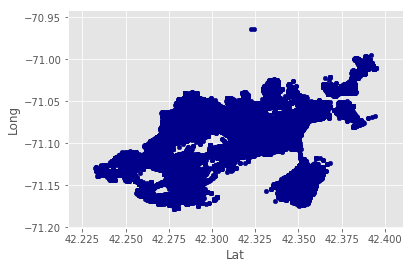

In [21]:
ax1 = dfnew.plot.scatter(x='Lat',
                      y='Long',
                      c='DarkBlue')

The outlying coordinates (~42.3”N,70.96”W) we’re identified to still be around the Boston area (more around the nearby islands) and thus remains in the dataset. The rest of the data look well grouped to the Boston location.

In [22]:
#Evaluate top Crime types
dfType= dfnew
dfType['GroupByType']=dfnew.groupby('OFFENSE_CODE_GROUP')['OFFENSE_CODE_GROUP'].transform('count')

TopCrimes = dfType.drop(['YEAR','MONTH','STREET','OCCURRED_ON_DATE','Lat','Long','Location'],axis=1)
TopCrimes.sort_values('GroupByType', ascending = False, inplace=True)
TopCrimes.drop_duplicates(inplace=True)
TopCrimes.set_index('OFFENSE_CODE_GROUP', inplace=True)
TopCrimes

,GroupByType
OFFENSE_CODE_GROUP,
Larceny,46743
Assault,29876
Vandalism,19376
Burglary,9093
Fraud,8070
Auto Theft,5766
Robbery,5264
Homicide,257
Prostitution,252


We can see that the most common type of crimes are Larceny, followed by Assault and then Vandalism. We can then evaluate the crimes per street.

In [23]:
dfType['GroupByStreet']=dfnew.groupby('STREET')['STREET'].transform('count')
CrimeStreets = dfType.drop(['OFFENSE_CODE_GROUP','YEAR','OCCURRED_ON_DATE','MONTH','Lat','Long','Location','GroupByType'],axis=1)
CrimeStreets.sort_values('GroupByStreet', ascending = False, inplace=True)
CrimeStreets.drop_duplicates(inplace=True)
CrimeStreets.set_index('STREET', inplace=True)
CrimeStreets.head(20)

,GroupByStreet
STREET,
WASHINGTON ST,6182
BOYLSTON ST,4341
BLUE HILL AVE,2699
TREMONT ST,2238
DORCHESTER AVE,2170
MASSACHUSETTS AVE,1957
HARRISON AVE,1861
HUNTINGTON AVE,1808
COMMONWEALTH AVE,1780


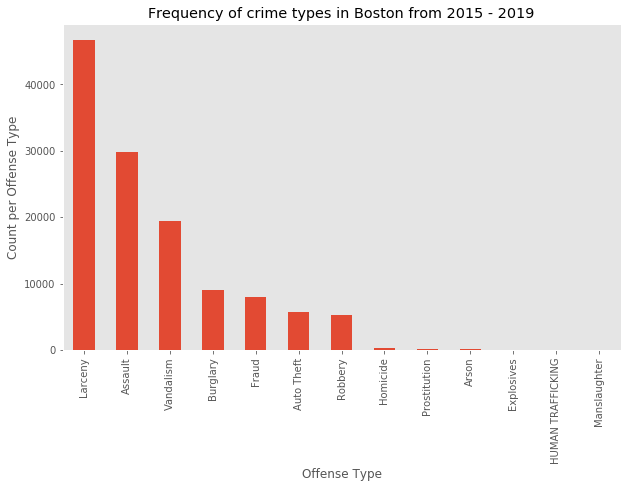

In [24]:
#Plot Chart
TopCrimes.plot(kind='bar', figsize=(10, 6), grid = False, legend = False)

plt.xlabel('Offense Type') # add to x-label to the plot
plt.ylabel('Count per Offense Type') # add y-label to the plot
plt.title('Frequency of crime types in Boston from 2015 - 2019') # add title to the plot

plt.show()

We will now look at the crime rate over the years provided. We can look at the trend over the past 5 years to determine whether it has increased or decreased.

In [25]:
dfYear= dfnew
dfYear['GroupByYear']=dfnew.groupby('YEAR')['YEAR'].transform('count')
dfYear

CrimesPerYear = dfYear.drop(['OFFENSE_CODE_GROUP','MONTH','STREET','OCCURRED_ON_DATE','Lat','Long','Location','GroupByType','GroupByStreet'],axis=1)
CrimesPerYear.sort_values('YEAR', ascending = True, inplace=True)
CrimesPerYear.drop_duplicates(inplace=True)
CrimesPerYear.set_index('YEAR', inplace=True)

CrimesPerYear

,GroupByYear
YEAR,
2015,18193
2016,29391
2017,28506
2018,28271
2019,20490


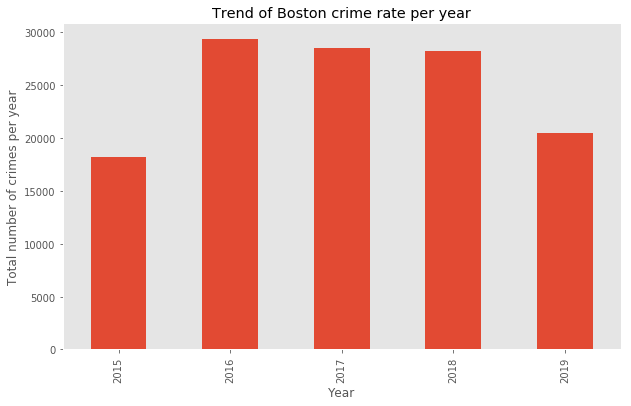

In [26]:
CrimesPerYear.plot(kind='bar', figsize=(10, 6),legend =False,grid=False)

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Total number of crimes per year') # add y-label to the plot
plt.title('Trend of Boston crime rate per year') # add title to the plot

plt.show()

It can be seen that although there has been a significant increase in crime from 2015 to 2016, the crime rate has almost reverted back in 2019 to the rate seen in 2015 and the trend currently indicates a decrease in crime. 

Now we will look at the top 7 crime types and the occurrence per year. We first create a dataframe to contain all the relevant data. I would expect 35 rows from my dataframe, as I want to evaluate 7 types of crime over 5 years.

In [27]:
#Work with top 7 crimes

#Create bottom 7 crime types dictionary
Bot7=['Homicide','Prostitution','Arson','Explosives','HUMAN TRAFFICKING','Manslaughter']
#Only include top 7 crimes in the dictionary
dfGroup=dfnew[~dfnew.OFFENSE_CODE_GROUP.isin(Bot7)]
#Add a counter for the grouping
dfGroup.loc[:, ('GroupCounter')] = '1'
dfGroup=dfGroup.groupby(['YEAR','OFFENSE_CODE_GROUP'])['GroupCounter'].count()
#Print shape to see rows
print (dfGroup.shape)
dfGroup.to_frame()

dfGroup.unstack(level=-1)


(35,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


OFFENSE_CODE_GROUP,Assault,Auto Theft,Burglary,Fraud,Larceny,Robbery,Vandalism
YEAR,,,,,,,
2015,3876,933,1786,982,6973,881,2663
2016,6600,1394,2335,1796,10895,1366,4842
2017,6782,1297,2076,1734,10543,1238,4644
2018,7248,1240,1736,2016,10750,1081,4084
2019,5370,902,1160,1542,7582,698,3143


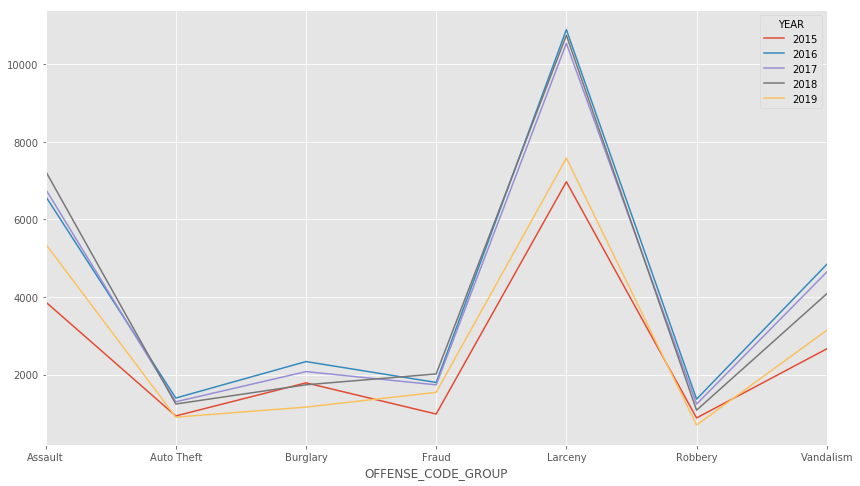

In [28]:
#draw line chart on top 7 crimes and trends throughout years
dfGroup =dfGroup.unstack(level=0)
dfGroup.plot(kind='line', figsize=(14, 8))


We can map all the crimes in Boston on a heat map to see if we can identify high crime neighborhoods since the data given was for crime per street location and not combined to a neighborhood. We will only use data for 2019. We then superimpose all the crime locations onto the map.

In [29]:
#get data for only 2019
C19 =dfnew.loc[dfnew['YEAR']==2019]
C19

,OFFENSE_CODE_GROUP,YEAR,MONTH,STREET,OCCURRED_ON_DATE,Lat,Long,Location,GroupByType,GroupByStreet,GroupByYear
15,Auto Theft,2019,10,LINCOLN ST,2019-10-13 09:28:24,42.259518,-71.121563,"(42.25951765, -71.12156299)",5766,242,20490
16,Auto Theft,2019,10,METROPOLITAN AVE,2019-10-12 20:11:26,42.262092,-71.116710,"(42.26209214, -71.11670964)",5766,137,20490
17,Auto Theft,2019,10,ALLSTON ST,2019-10-12 15:12:43,42.352375,-71.135096,"(42.35237455, -71.13509584)",5766,169,20490
18,Auto Theft,2019,10,SAINT JAMES AVE,2019-10-12 04:41:52,42.349476,-71.076402,"(42.34947586, -71.07640150)",5766,71,20490
19,Auto Theft,2019,10,N MEAD ST,2019-10-02 08:08:49,42.381846,-71.066551,"(42.38184582, -71.06655134)",5766,5,20490
22,Vandalism,2019,9,ASPINWALL RD,2019-09-29 06:00:00,42.291816,-71.072441,"(42.29181580, -71.07244098)",19376,29,20490
26,Vandalism,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)",19376,248,20490
27,Assault,2019,9,CAUSEWAY ST,2019-09-29 04:46:00,42.364331,-71.063193,"(42.36433126, -71.06319318)",29876,248,20490
29,Burglary,2019,9,ABBOTSFORD ST,2019-09-29 04:40:00,42.314630,-71.092615,"(42.31462973, -71.09261520)",9093,35,20490
36,Larceny,2019,9,W BROADWAY,2019-09-29 03:04:00,42.340070,-71.052794,"(42.34006986, -71.05279420)",46743,473,20490


We can also look at how many times a location features

In [30]:
C19['Location'].value_counts()

(42.34862382, -71.08277637)    175
(42.34840576, -71.08688339)    101
(42.35512339, -71.06087980)     94
(42.35997967, -71.05474135)     92
(42.33210843, -71.07014395)     87
(42.35176179, -71.07452168)     86
(42.34797240, -71.07849582)     79
(42.34496729, -71.06382224)     73
(42.33401829, -71.07638124)     67
(42.35602373, -71.06177615)     63
(42.35095909, -71.07412780)     60
(42.32696647, -71.06198607)     58
(42.32809966, -71.06321676)     58
(42.33152148, -71.07085307)     55
(42.34980175, -71.07840978)     54
(42.27130225, -71.07442362)     53
(42.33511904, -71.07491710)     50
(42.34044966, -71.08845935)     49
(42.35521625, -71.06012863)     49
(42.34489594, -71.09659186)     48
(42.35037870, -71.07626098)     47
(42.34285014, -71.06516235)     43
(42.33380683, -71.10377843)     43
(42.35540738, -71.06312433)     42
(42.33428841, -71.07239518)     41
(42.34813158, -71.08027002)     40
(42.37620267, -71.03979926)     40
(42.27968299, -71.09286048)     39
(42.34717363, -71.09

We can count the number of times a location features for the 2019 crime dataset

In [31]:
#Count the number of times a location features - this will be used for heat maps
C19['CrimeCount']=C19.groupby('Location')['Location'].transform('count')

C19 = C19.drop((['OFFENSE_CODE_GROUP','YEAR','MONTH','Location','OCCURRED_ON_DATE','GroupByType','GroupByYear','GroupByStreet']),1)
C19 = C19.sort_values(by ='CrimeCount' , ascending=False)
C19.drop_duplicates(inplace=True)
C19

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,STREET,Lat,Long,CrimeCount
59473,BOYLSTON ST,42.348624,-71.082776,175
55080,NEWBURY ST,42.348406,-71.086883,101
19424,WASHINGTON ST,42.355123,-71.060880,94
54626,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,92
36324,SOUTHAMPTON ST,42.332108,-71.070144,87
42152,NEWBURY ST,42.351762,-71.074522,86
69392,HUNTINGTON AVE,42.347972,-71.078496,79
5372,HARRISON AVE,42.344967,-71.063822,73
43715,HARRISON AVE,42.334018,-71.076381,67
48993,WINTER ST,42.356024,-71.061776,63


Now we can plot our 2019 crime data as a heat map

In [32]:
from folium import plugins
from folium.plugins import HeatMap


# List comprehension to make out list of lists
heat_data = [[row['Lat'], 
              row['Long']] for index, row in C19.iterrows()]

# Plot it on the map


HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(boston_map)

# Display the map
boston_map

### School Data
___

For the school data it is ideal to point out on a map the location of each school to understand the density of schools per neighborhood. It would be ideal to live in a neighborhood where there are two or more school options to choose from. First I look at the amount of elementary schools available per neighborhood and sort based on the amount of schools per neighborhood and then popuate the data onto a map.

In [33]:
#Define the School Neighborhood dataset
dfSD2 = dfSD
dfSN= dfSD2
#Count the number of schools per neighborhood
dfSN['TotalSchools']=dfSN.groupby('Neighborhood')['Neighborhood'].transform('count')
dfSN = dfSN[['Neighborhood','TotalSchools']]
dfSN.drop_duplicates(inplace=True)
#Sort and reindex the schools
dfSN = dfSN.sort_values(by ='TotalSchools' , ascending=False)
dfSN.reset_index(drop= True,inplace=True)

dfSN

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,TotalSchools
0,Dorchester,13
1,East Boston,7
2,Roxbury,7
3,Roslindale,5
4,Hyde Park,3
5,Jamaica Plain,3
6,South Boston,2
7,Brighton,2
8,Mattapan,2
9,West Roxbury,1


In [34]:
# add the Elementary schools as purple circle markers
for lat, lng, label in zip(dfSD.Latitude, dfSD.Longitude, dfSD.School_Name):
    folium.Circle(
        [lat, lng],color='purple').add_to(boston_map)
  
    
# display map
boston_map

### FourSquare Data
___
I will now use the FourSquare data obtained on the Museum location to mark it on a map. This will be my "centre" or "critical" location point to continuously consider for neighborhood locations.

In [35]:
folium.Marker([mu_lat, mu_long],popup='Museum of Science',icon=folium.Icon(color='red')).add_to(boston_map)
boston_map

Lets now have a look at our restaurant data from FourSquare. We first look at a descriptive exploration on the general location of restaurants and the data distribution on the distance from the museum.

In [36]:
df.describe()

,distance,lat,lng
count,29.000000,29.000000,29.000000
mean,2243.793103,42.353000,-71.061703
std,1296.196589,0.013837,0.016527
min,459.000000,42.322362,-71.105541
25%,1157.000000,42.346636,-71.065327
50%,1784.000000,42.351707,-71.060988
75%,3028.000000,42.361076,-71.055872
max,4970.000000,42.379929,-71.027055


It can be seen that there are 27 entries with the mean location at coordinates latitude = 42.356070, longitude = -71.058684 and that the general distance of the restaurants from the museum is approximately 1km. The furthest restaurant data entry is about 4.3km from the museum location. I then identify the type of restaurants in Boston.

In [37]:
venues=df.groupby('categories')['name'].count().sort_values(ascending=False)
venues.head().to_frame()

,name
categories,
Chinese Restaurant,3
American Restaurant,3
Italian Restaurant,3
Diner,2
Pizza Place,2


We then have a look to see if we can predict whether the same type of restaurants are typically locate in the same area. We'll only look at the top 3 types of restaurants in Boston - American, Italian and Chinese restaurants.

In [38]:
#Only select American, Italian and Chinese restaurants.
RestGroup = ['American Restaurant', 'Italian Restaurant','Chinese Restaurant']

RGroup = df[df.categories.isin(RestGroup)]
RGroup=RGroup[['name','categories','lat','lng']]

#assign a value to each restaurant category
RGroup['Value'] = [1 if x =='American Restaurant' else 2 if x =='Italian Restaurant' else 3 for x in RGroup['categories']] 

RGroup

,name,categories,lat,lng,Value
6,Moon Villa Restaurant,Chinese Restaurant,42.351884,-71.059554,3
7,Pulcinella Mozzarella Bar and Restaurant,Italian Restaurant,42.363693,-71.055872,2
14,New Jumbo Seafood Restaurant,Chinese Restaurant,42.350902,-71.059895,3
16,Pearl Villa Restaurant,Chinese Restaurant,42.350690,-71.061010,3
24,Carrie Nation Restaurant & Cocktail Club,American Restaurant,42.358316,-71.061458,1
36,224 Boston Street Restaurant,American Restaurant,42.322362,-71.060988,1
38,Mario's Restaurant,Italian Restaurant,42.378173,-71.028871,2
41,Rock Bottom Restaurant & Brewery,American Restaurant,42.351329,-71.065327,1
46,Toscano Restaurant,Italian Restaurant,42.357360,-71.070026,2


Text(0.0, 1.0, 'Scatter Plot of Type of Restaurant based on Latitude')

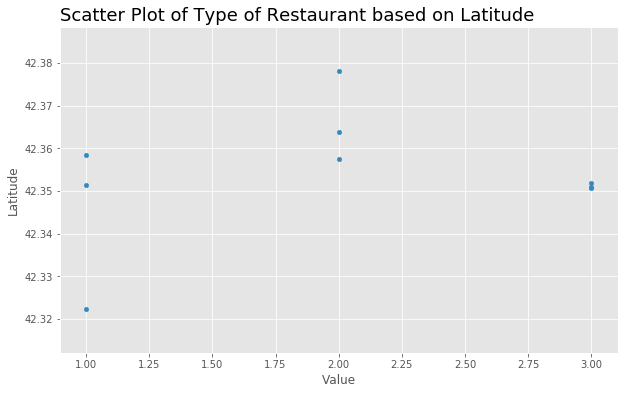

In [39]:
#Create scatterplot for Restaurant type vs latitude
RGroup.plot.scatter('Value', 'lat', figsize=(10,6))

plt.xlabel('Value')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Type of Restaurant based on Latitude', loc='left', fontsize=18)

Text(0.0, 1.0, 'Scatter Plot of Type of Restaurant based on Longitude')

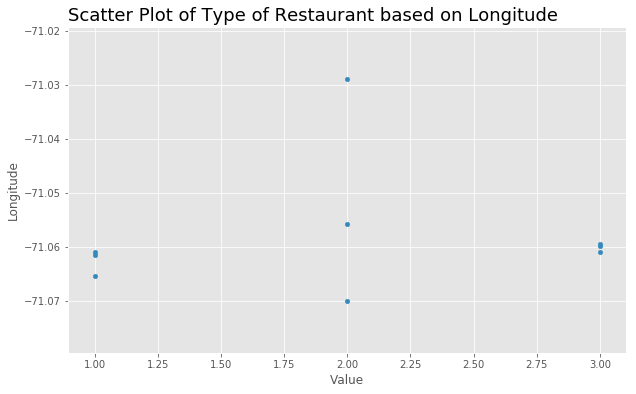

In [40]:
#Create scatterplot for Restaurant type vs longitude
#Create scatterplot for Restaurant type vs latitude
RGroup.plot.scatter('Value', 'lng', figsize=(10,6))

plt.xlabel('Value')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Type of Restaurant based on Longitude', loc='left', fontsize=18)

We see that the Chinese restaurants are typically located together. We can also visualise these results to confirm our conclusion

In [41]:
res_map = folium.Map(location=[bos_long, bos_lat], zoom_start=12)

                                                             
RGroup['categories'] = pd.cut(RGroup['Value'], bins=3, 
                              labels=['yellow', 'green', 'blue'])
for index, row in RGroup.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                    radius=15, color=row['categories']).add_to(res_map)

res_map

I will then superimpose all the restaurants on a map.

In [42]:
# add the restaurants as red circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories):
       folium.CircleMarker(
        [lat, lng],color='blue').add_to(boston_map)

        
# display map
boston_map

### Predictive modeling

The type of model that will assist in solving the problem needs to be identified. As the intent is to identify an area or neighborhood that features most of the location preferences, clustering is recognized as the ideal exploratory data analysis technique.


Clustering is the grouping of data based on shared characteristics. One type of partitioned based clustering algorithm is K-means Clustering. K-means is an iterative algorithm that uses distance-based measurements to determine similarity between data points. It’s one of the simplest and most popular unsupervised machine learning algorithms.


The data to use for the model needs to be prepared to only include numerical data. K-means clustering will be used to identify ideal neighborhoods, so that indicates focusing on positive traits and thus only restaurant and school data will be used and the crime data will be excluded. The restaurant and school data is combined into a new dataframe and the dataframe is cleaned up to only include numerical data. 


First the cluster centroids need to be determined. The Euclidean distance for each point is calculated from the centroid and an elbow curve is developed to visually show the ideal number of clusters to continue with based on the data. 

In [43]:
#I first create a combined information dataframe based on location
dfSD.rename(columns={'Latitude':'Lat', 'Longitude':'Long'}, inplace = True)
df.rename(columns={'lat':'Lat', 'lng':'Long'},inplace=True)

dfCombine=pd.concat([C19,dfSD,df],sort=False)

#Then I assign Type values to data, CrimeData=1, SchoolData=2,RestaurantData=3, Convert Categorical features to numerical values

conditions = [
    (dfCombine['CrimeCount'].isna()&dfCombine['School_Name'].isna()),
    (dfCombine['CrimeCount'].isna()&dfCombine['name'].isna()),
    (dfCombine['name'].isna()&dfCombine['School_Name'].isna())]
choices = ['3','2','1']

dfCombine['TypeValue'] = np.select(conditions, choices)

#I then only use theLat, Long and Type value for my ML

dfCombine=dfCombine[['Lat','Long','TypeValue']] 


conditions = [
    dfCombine['TypeValue']=='1',
    ((dfCombine['TypeValue']>='1')& (dfCombine['TypeValue']<='2')),
    dfCombine['TypeValue']>='3']
choices = ['Crime','School','Restaurant']

dfCombine['Category'] = np.select(conditions, choices)

#Identify if its an ideal location or not

conditions = [dfCombine['TypeValue']>'1',dfCombine['TypeValue']<'2']
choices = ['Yes','No']

dfCombine['IdealLoc'] = np.select(conditions, choices)

#Since Category is related to TYpeValue we drop the Category so as only to work with numerical data

dfCombine['SpesLoc'] = dfCombine[['Lat', 'Long']].astype(str).apply(lambda x: ' , '.join(x), axis=1)
dfGoodLocations = dfCombine[~dfCombine.Category.str.contains("Crime")]

print(dfCombine.shape)
print(dfCombine.head(5))
dfCombine.tail(40)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(6830, 6)
             Lat       Long TypeValue Category IdealLoc  \
59473  42.348624 -71.082776         1    Crime       No   
55080  42.348406 -71.086883         1    Crime       No   
19424  42.355123 -71.060880         1    Crime       No   
54626  42.359980 -71.054741         1    Crime       No   
36324  42.332108 -71.070144         1    Crime       No   

                          SpesLoc  
59473  42.34862382 , -71.08277637  
55080  42.34840576 , -71.08688339  
19424   42.35512339 , -71.0608798  
54626  42.35997967 , -71.05474135  
36324  42.33210843 , -71.07014395  


,Lat,Long,TypeValue,Category,IdealLoc,SpesLoc
109,42.285385,-71.117692,2,School,Yes,"42.285385 , -71.117692"
110,42.347990,-71.064984,2,School,Yes,"42.34799 , -71.064984"
116,42.320361,-71.059497,2,School,Yes,"42.3203612 , -71.0594969"
117,42.282111,-71.086856,2,School,Yes,"42.282111 , -71.0868557"
121,42.295497,-71.071087,2,School,Yes,"42.295497 , -71.071087"
122,42.286408,-71.126880,2,School,Yes,"42.286408 , -71.12688"
123,42.277404,-71.077611,2,School,Yes,"42.277404 , -71.0776112"
128,42.334526,-71.039007,2,School,Yes,"42.3345263 , -71.0390073"
132,42.306015,-71.073605,2,School,Yes,"42.3060151 , -71.0736048"
138,42.347723,-71.154965,2,School,Yes,"42.3477234 , -71.1549648"


But since we will only be using "good location" data I'll only use the data for the restaurants and schools

In [44]:
dfGood = dfGoodLocations
dfGood

,Lat,Long,TypeValue,Category,IdealLoc,SpesLoc
0,42.365553,-71.034917,2,School,Yes,"42.365553 , -71.0349174"
1,42.371565,-71.037608,2,School,Yes,"42.3715652 , -71.037608"
4,42.277663,-71.135353,2,School,Yes,"42.277663 , -71.1353531"
5,42.263520,-71.155824,2,School,Yes,"42.26352 , -71.155824"
6,42.341012,-71.072056,2,School,Yes,"42.3410123 , -71.0720558"
16,42.391629,-71.005053,2,School,Yes,"42.3916287 , -71.0050532"
20,42.251551,-71.133338,2,School,Yes,"42.251551 , -71.133338"
22,42.267390,-71.104443,2,School,Yes,"42.26739 , -71.104443"
23,42.323080,-71.058505,2,School,Yes,"42.3230799 , -71.0585048"
26,42.338163,-71.052514,2,School,Yes,"42.3381626 , -71.0525141"


In [45]:
cluster_map = folium.Map(location=[bos_long, bos_lat], zoom_start=12)
crime_map = folium.Map(location=[bos_long, bos_lat], zoom_start=12)
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(crime_map)

I plot my good location data onto a map with my crime data as a heat map

In [46]:
bad_lat = C19['Lat'].values
bad_long = C19['Long'].values
bad_loc=[[lat,lon] for lat,lon in zip(bad_lat,bad_long)]

good_lat = dfGood['Lat'].values
good_long = dfGood['Long'].values
good_loc=[[lat,lon] for lat,lon in zip(good_lat,good_long)]

In [47]:
#for lat,lon in zip(bad_lat,bad_long):
#    folium.Circle([lat,lon],color='blue').add_to(crime_map)

for lat,lon in zip(good_lat,good_long):
    folium.Circle([lat,lon],color='blue').add_to(crime_map)
    
crime_map

I will now be making use of K-Means clustering to identify ideal locations to live in.

I first determine cluster centroids, calculate euclidean distance for each point from my centroid and develop an elbow curve to visually show the ideal number of cluster to continue with based on the data.

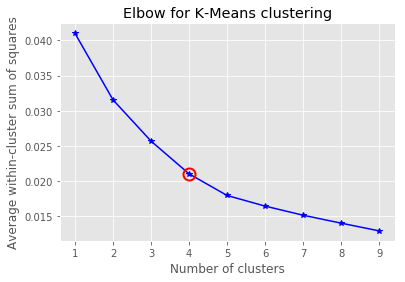

In [48]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X=dfCombine[['Lat','Long']]
X.dtypes

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]  

kIdx = 3
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering') 



In [49]:
from sklearn.cluster import KMeans
km = KMeans(4, init='k-means++') # initialize
km.fit(X)
c = km.predict(X) # classify into four clusters


We see that a good K or number of clusters to use in our model will be 4

 I then develop the K-means model and fit my data to the model from where I obtian 4 cluster centers which I then super impose on a map to identify ideal locations to stay in.

In [50]:
from sklearn.cluster import KMeans
num_clus = 4
bad_xys=C19[['Lat','Long']].values
good_xys=dfGood[['Lat','Long']].values

In [51]:
#kmeans = KMeans(n_clusters = num_clus,random_state=0).fit(bad_xys)
kmeans = KMeans(n_clusters = num_clus,random_state=0).fit(good_xys)

In [52]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 42.35207454, -71.06039524],
       [ 42.28570345, -71.13181767],
       [ 42.31144433, -71.07620802],
       [ 42.37861659, -71.0266932 ]])

In [53]:
for lat, lon in cluster_centers:
 #   folium.Circle([lat, lon], radius=50, color='red', fill=True, fill_opacity=0.5).add_to(crime_map) 
   folium.Marker([lat, lon],popup=('Ideal Location'),icon=folium.Icon(color='purple')).add_to(crime_map)
#add museum location
folium.Marker([mu_lat, mu_long],popup='Museum of Science',icon=folium.Icon(color='red')).add_to(crime_map)
#for lat, lon in zip(bad_lat, bad_long):
for lat, lon in zip(good_lat, good_long):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(crime_map)
crime_map

## Results
___ 

From the results the highest crime area is located around the Financial District (downtown Boston) close by Chinatown. This would not be an ideally suited neighborhood to select.
Directing attention to the school data, it is beneficial if a neighborhood is chosen that provides multiple options, but it’s important to take note that where there are more options the neighborhood might also be considerably bigger than other neighborhoods. From the school results no conclusion can be made as yet on a preferred neighborhood as there are no immediate visible clusters.

From the restaurant data, apart from the Chinese cuisine type clustered in Chinatown, there seems to be quite a variety of restaurants with various cuisine types all over Boston allowing for a variety of restaurants for a chef to work at. This data on its own does not provide a concrete solution for a neighborhood. 

From the clustering results of desirable traits (schools and restaurants) in a location, 4 neighborhoods were marked on a heat map of crime locations. These locations can then be further evaluated based on closer inspection or a zoomed in view of the map.
As a final result, the four ideal neighborhoods to live in was marked with the following coordinates and upon further investigation the neighborhoods were determined:
- [ 42.30965123, -71.07414251] – Roxbury,
- [ 42.28570345, -71.13181767] – Roslindale,
- [ 42.35243914, -71.06025271] – Chinatown,
- [ 42.37861659, -71.0266932] – East Boston.

These markers only considered the positive attributes of neighborhoods, so when looking at figure 20 and including the crime heat map, it can be seen that Chinatown is located in a high crime location and is thus eliminated as a possible option for a neighborhood to consider.
Final desirable neighborhoods to live in based on the induvial needs and location from the museum ideal neighborhoods to consider are then East Boston, Roxbury and Roslindale in no specific order.


## Discussion
___ 
The recommended neighborhoods should be considered as a starting point for further, more detailed analysis where other preferences such as housing or traffic data can then be taken into consideration. Prioritization of needs can also be applied to assist in decision making.
Even though the crime rate has decreased, crime remains everywhere and thus when finally deciding on a neighborhood, it is important to look out for high-crime locations or streets in the chosen neighborhood and to also consider the type of crime in that area. 
It would also be desirable to have more data pertaining to schools (where possible) as well as restaurants.

The analysis indicates that deciding on a neighborhood to fully adhere to the parameters of the individuals needs can be tricky but doable, especially when a machine learning algorithm is implemented to point out possible neighborhoods more clearly by means of clustering.  


There is definitely room for improvement on this project and with more work this can be developed into a fully pledged application to assist individuals when relocating. Additional data can be included such as traffic or property trends and school costs etc. and a wider area can also be considered. More detail can also be supplied with regards to the final results.

## Conclusion
___ 
The purpose of this project was met to leverage location data to assist an individual in his/her decision of which neighborhood to live in when relocating to an unfamiliar location The model developed assists in narrowing down ideal neighborhoods to select from based on stakeholder needs or preferences. Through clustering preferences, the cluster locations created is an ideal starting point for final exploration by the stakeholders. Final decision on the chosen neighborhood will be made by each stakeholder taking in their own needs and priorities into consideration.
